<a href="https://colab.research.google.com/github/DeepLearning-Y4/TrafficSignRecognition/blob/main/TrafficSignRecognition_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TrafficSignRecognition_CNN_model

### Load and Explore Dataset

The dataset already has preprocessed training and testing .p (pickle) files.

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Unzip the dataset

In [4]:
# Unzip the dataset
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'
extract_path = '/content/traffic_signs'

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset already extracted!")

Dataset already extracted!


### Load and Explore Dataset

In [5]:
# ===== Load and Explore Dataset =====
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load training and testing data
with open('/content/traffic_signs/train.pickle', 'rb') as f:
    train_data = pickle.load(f)
with open('/content/traffic_signs/valid.pickle', 'rb') as f:
    valid_data = pickle.load(f)
with open('/content/traffic_signs/test.pickle', 'rb') as f:
    test_data = pickle.load(f)

# Extract images and labels
X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print('Training set:', X_train.shape)
print('Validation set:', X_valid.shape)
print('Test set:', X_test.shape)
print('Number of classes:', len(np.unique(y_train)))

Training set: (34799, 32, 32, 3)
Validation set: (4410, 32, 32, 3)
Test set: (12630, 32, 32, 3)
Number of classes: 43


Preview some images:

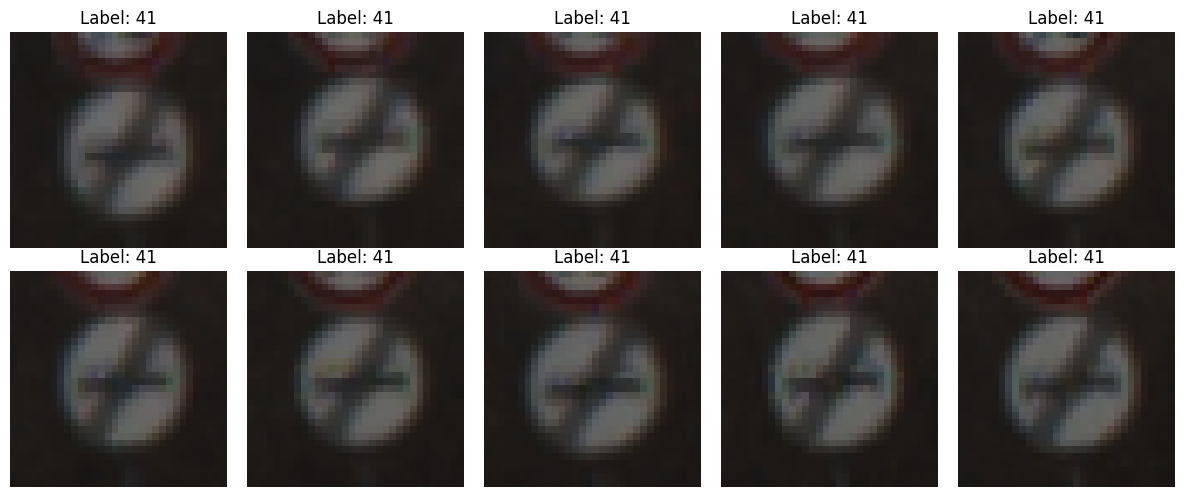

In [6]:
# Preview some images
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    axs[i//5, i%5].imshow(X_train[i])
    axs[i//5, i%5].set_title(f"Label: {y_train[i]}")
    axs[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()

### Data Preprocessing
Normalize and convert to grayscale (optional but improves performance):

In [7]:
# ===== Data Preprocessing =====
import cv2

# Convert to grayscale
print("Converting to grayscale...")
X_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train])
X_valid_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_valid])
X_test_gray  = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test])

# Normalize pixel values to [0, 1]
X_train_gray = X_train_gray / 255.0
X_valid_gray = X_valid_gray / 255.0
X_test_gray  = X_test_gray / 255.0

# Reshape for CNN input (N, H, W, 1)
X_train_gray = X_train_gray.reshape(X_train_gray.shape + (1,))
X_valid_gray = X_valid_gray.reshape(X_valid_gray.shape + (1,))
X_test_gray  = X_test_gray.reshape(X_test_gray.shape + (1,))

print("Preprocessing complete!")
print("Training shape:", X_train_gray.shape)


Converting to grayscale...
Preprocessing complete!
Training shape: (34799, 32, 32, 1)


### Build the CNN Model
We'll build a simple CNN similar to LeNet architecture:

In [8]:
# ===== Build Optimized CNN Model =====
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001),
                  input_shape=(32,32,1)),
    layers.BatchNormalization(),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(43, activation='softmax')  # 43 traffic sign classes
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           51

 Total params: 704,651 (2.69 MB)

 Trainable params: 703,243 (2.68 MB)

 Non-trainable params: 1,408 (5.50 KB)

### Compile and Train the Model



In [9]:
# ===== Compile Model =====
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===== Set up Callbacks =====
# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-7,
    verbose=1
)

# ===== Train Model =====
print("\nTraining the model...")
history = model.fit(
    X_train_gray, y_train,
    epochs=50,
    validation_data=(X_valid_gray, y_valid),
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)



Training the model...
Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.1450 - loss: 4.6385 - val_accuracy: 0.0476 - val_loss: 5.1293 - learning_rate: 0.0010
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6997 - loss: 1.8140 - val_accuracy: 0.4156 - val_loss: 3.1459 - learning_rate: 0.0010
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8949 - loss: 1.0576 - val_accuracy: 0.9522 - val_loss: 0.7599 - learning_rate: 0.0010
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9509 - loss: 0.7525 - val_accuracy: 0.9744 - val_loss: 0.5881 - learning_rate: 0.0010
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9687 - loss: 0.5866 - val_accuracy: 0.9649 - val_loss: 0.5137 - learning_rate: 0.0010
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9772 - loss: 0.4830 - val_accuracy: 0.9789 - val_loss: 0.4252 - learning_rate: 0.0010
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc

### Evaluate Performance

In [10]:
# ===== Evaluate Performance =====
print("\nEvaluating on test set...")
test_loss, test_acc = model.evaluate(X_test_gray, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# Evaluate on training and validation sets for comparison
train_loss, train_acc = model.evaluate(X_train_gray, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_valid_gray, y_valid, verbose=0)

print(f"\nTraining Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Validation Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")


Evaluating on test set...
Test Loss: 0.1148
Test Accuracy: 0.9819 (98.19%)

Training Accuracy: 1.0000 (100.00%)
Validation Accuracy: 0.9946 (99.46%)
Test Accuracy: 0.9819 (98.19%)


Plot accuracy/loss curves:

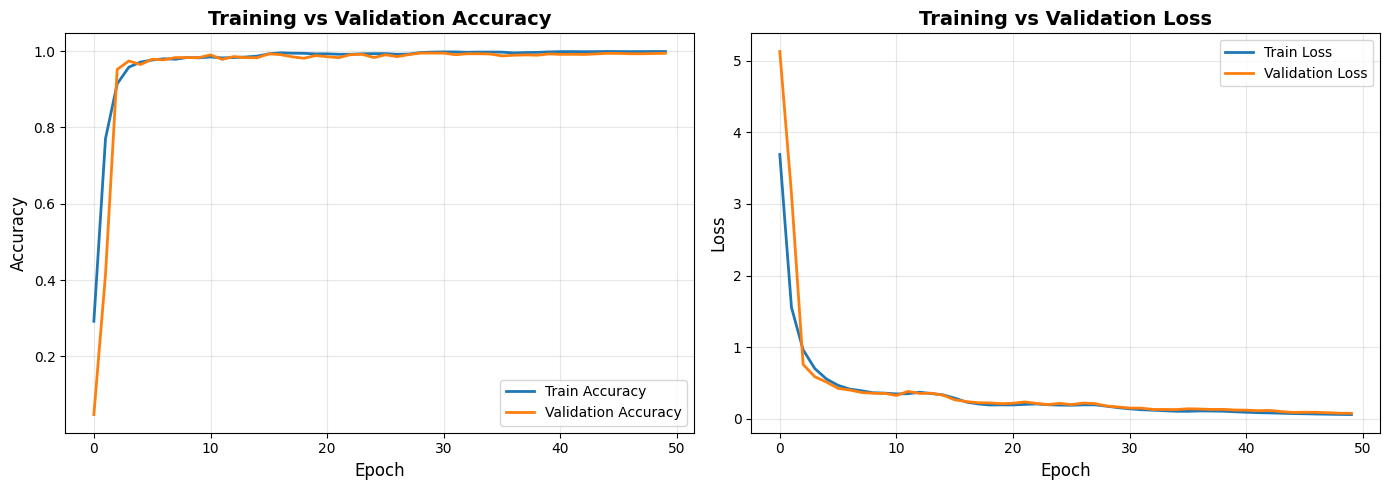

In [11]:
# ===== Plot Training History =====
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Confusion Matrix & Classification Report

In [13]:
# ===== Evaluate Performance Metrics =====
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Generate predictions
y_pred = np.argmax(model.predict(X_test_gray), axis=1)

# Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, digits=4))

# ===== Performance Metrics Summary =====
print("\n" + "="*60)
print("PERFORMANCE METRICS SUMMARY")
print("="*60)

metrics_dict = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision (Macro)': precision_score(y_test, y_pred, average='macro', zero_division=0),
    'Recall (Macro)': recall_score(y_test, y_pred, average='macro', zero_division=0),
    'F1-Score (Macro)': f1_score(y_test, y_pred, average='macro', zero_division=0),
    'Precision (Weighted)': precision_score(y_test, y_pred, average='weighted', zero_division=0),
    'Recall (Weighted)': recall_score(y_test, y_pred, average='weighted', zero_division=0),
    'F1-Score (Weighted)': f1_score(y_test, y_pred, average='weighted', zero_division=0)
}

for metric, value in metrics_dict.items():
    print(f"{metric:.<40} {value:.4f} ({value*100:.2f}%)")

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        60
           1     0.9904    1.0000    0.9952       720
           2     0.9828    0.9933    0.9881       750
           3     0.9424    0.9822    0.9619       450
           4     1.0000    0.9894    0.9947       660
           5     0.9767    0.9968    0.9866       630
           6     1.0000    0.8867    0.9399       150
           7     0.9912    1.0000    0.9956       450
           8     0.9977    0.9444    0.9703       450
           9     0.9877    1.0000    0.9938       480
          10     1.0000    0.9985    0.9992       660
          11     0.9653    0.9929    0.9789       420
          12     0.9914    0.9971    0.9942       690
          13     0.9945    0.9958    0.9951       720
          14     0.9963    1.0000    0.9982       270
          15     1.0000    0.9952    0.9976       210
          16     

### Save the Model

In [14]:
model.save('/content/drive/MyDrive/traffic_sign_cnn_optimized.h5')
print("\nModel saved successfully to Google Drive!")


Model saved successfully to Google Drive!


### Save results to a text file

In [15]:
# Save results to a text file
with open('/content/drive/MyDrive/cnn_results.txt', 'w') as f:
    f.write("CNN Model Performance Results\n")
    f.write("="*60 + "\n\n")
    f.write(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)\n")
    f.write(f"Test Loss: {test_loss:.4f}\n\n")
    for metric, value in metrics_dict.items():
        f.write(f"{metric}: {value:.4f} ({value*100:.2f}%)\n")

print("Results saved to cnn_results.txt in Google Drive!")

Results saved to cnn_results.txt in Google Drive!
